In [1]:
import io

import fastai
import requests
import torch
from fastai.vision import open_image, ImageDataBunch, \
    imagenet_stats, create_cnn
from fastai.vision.models import resnet34
from fastai.vision.transform import get_transforms

CLASES = ['cats', 'dogs']
MODEL = resnet34
CUSTOM_MODEL_PATH = '/data/dogscats/models/lession1-resnet34-2' 

def load_image(url):
    return open_image(io.BytesIO(requests.get(url).content))

fastai.defaults.device = torch.device('cpu')

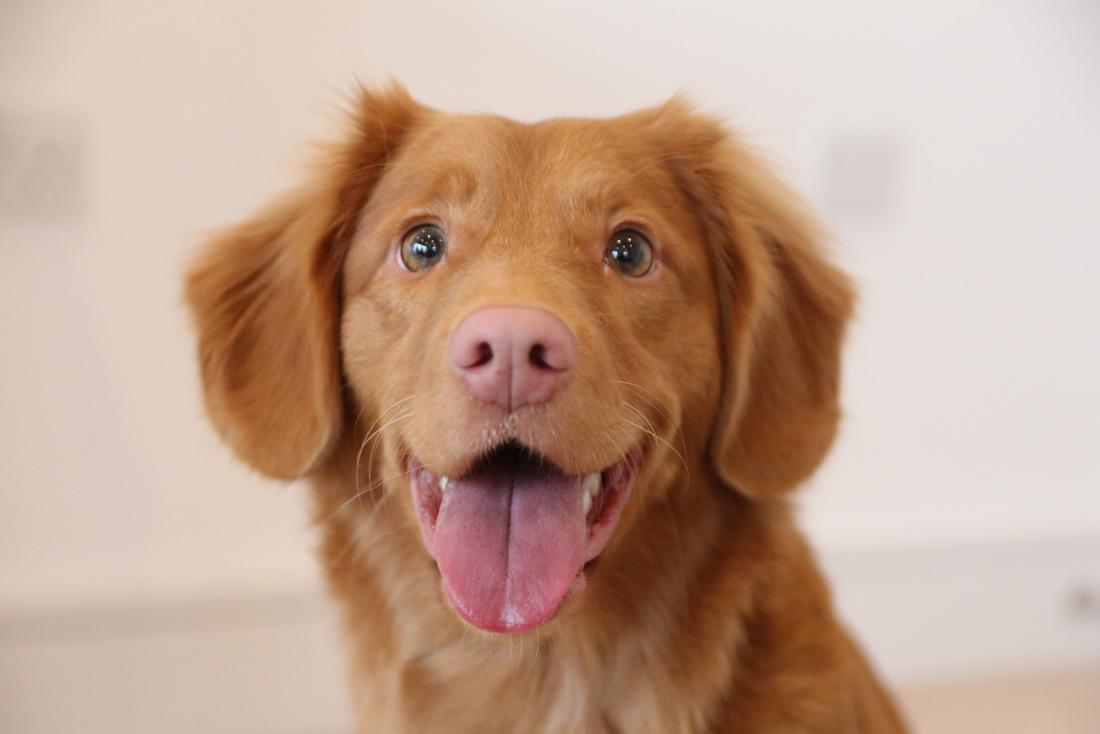

In [2]:
img = load_image('https://cdn1.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')
img

In [3]:
data = ImageDataBunch.single_from_classes(
    '', CLASES, tfms=get_transforms(), size=224
).normalize(imagenet_stats)
learn = create_cnn(data, MODEL).load(CUSTOM_MODEL_PATH)
pred_class,pred_idx,outputs = learn.predict(img)

In [4]:
pred_class

'dogs'